In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt

c:\Users\khirod\miniconda3\envs\mynlpenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\khirod\miniconda3\envs\mynlpenv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\khirod\miniconda3\envs\mynlpenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/ais_2014B_2020B_V2.csv',sep = ',')

df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')


In [3]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration):
    reload(fn)
    if hydrophone_idx==1:
        hydro='Axial_Base'
    elif hydrophone_idx==2:
        hydro='Central_Caldera'
    elif hydrophone_idx==3:
        hydro='Eastern_Caldera'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    
    return isolated_ships,isolated_ais

In [22]:
hydrophone_idx=1
min_duration=20
inner_rad=10
outer_rad=30

In [23]:
ais = fn.choose_df(df,hydrophone_idx)

 Max distance: 166.51 and Min distance: 0.01


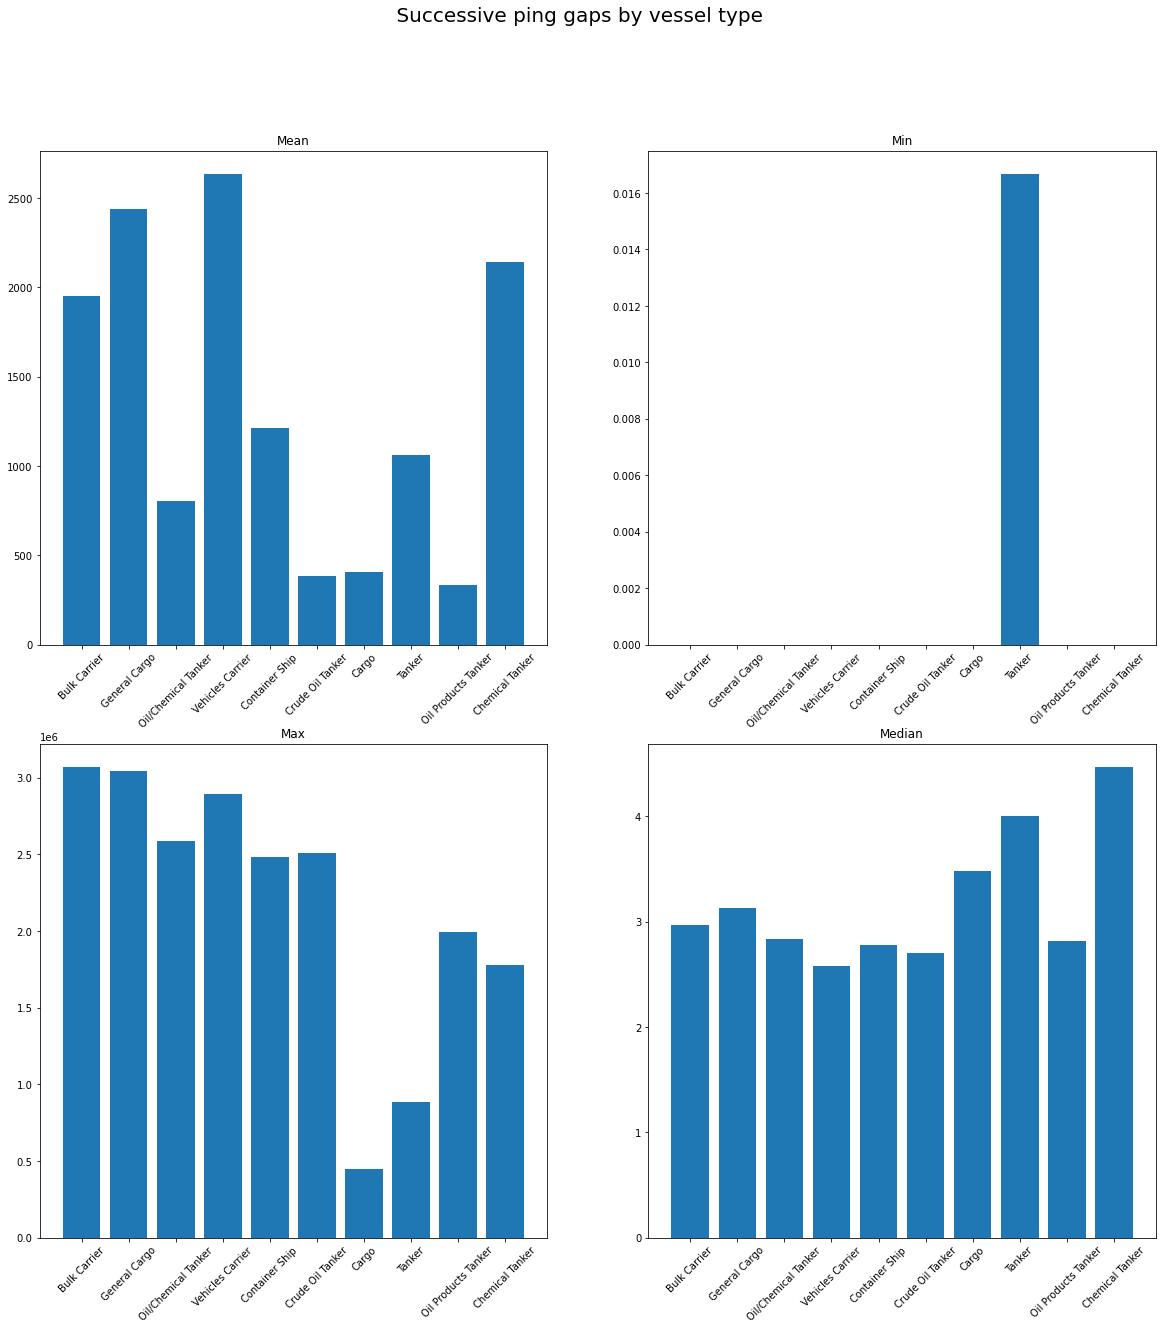

In [44]:

reload(fn)
df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')
ships_pings,vessels_pings= fn.ais_ping_distribution(ais,bar_show=True)

In [46]:
vessels_pings[vessels_pings['VESSEL TYPE']== 'Research/Survey Vessel']

,VESSEL TYPE,distinct count ships,mean_ping_time,min_ping_time,max_ping_time,median_ping_time
47,Research/Survey Vessel,19,201.287444,0.0,1.287155e+06,2.716667


In [83]:
   
   
ais_vessel=ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','mean speed','median speed','mean distance']
ais_vessel=ais_vessel.sort_values(by='number ais records',ascending=False)
ais_vessel

,VESSEL TYPE,number ais records,distinct count ships,mean speed,median speed,mean distance
1,Bulk Carrier,1229533,4034,106.933049,114.0,89.142331
10,Crude Oil Tanker,146937,151,68.481145,63.0,72.800498
38,Oil/Chemical Tanker,134970,396,87.093784,111.0,78.872098
70,Vehicles Carrier,97455,355,139.150480,148.0,88.792456
20,General Cargo,84851,405,114.968050,120.0,87.682735
...,...,...,...,...,...,...
14,Dredger,3,3,245.333333,119.0,85.850000
44,Pilot Vessel,1,1,4.000000,4.0,21.940000
6,Cement Carrier,1,1,25.000000,25.0,64.620000
28,LNG Tanker,1,1,128.000000,128.0,104.490000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

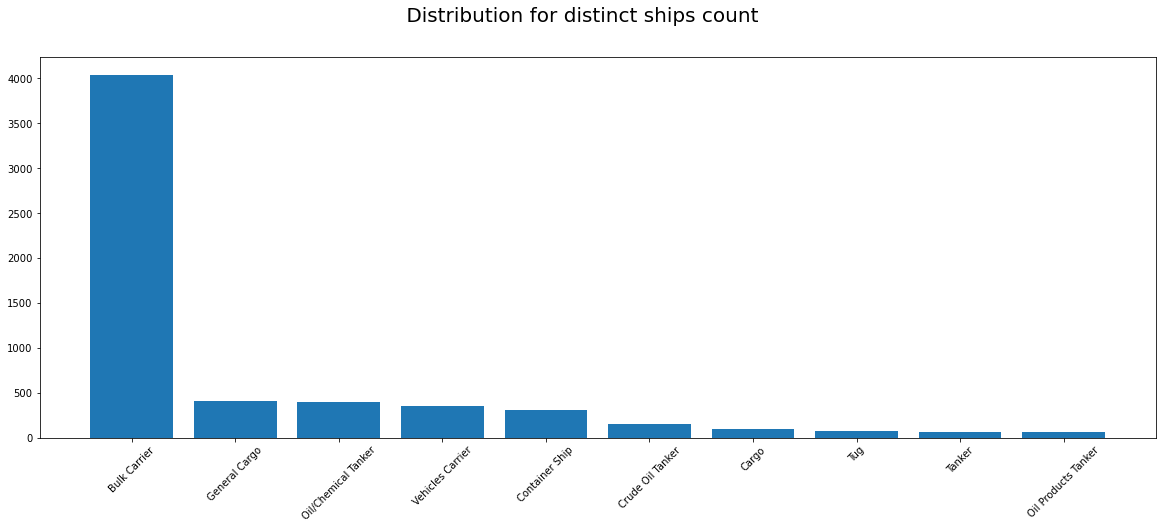

In [58]:
n=10
fig,ax= plt.subplots(1,1,figsize=(20,7))
fig.suptitle(' Distribution for distinct ships count', fontsize=20)
ais_vessel_dist=ais_vessel.sort_values(by='distinct count ships',ascending=False)
plt.bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
plt.xticks(rotation = 45)


### EDA for isolated ships

In [78]:
hydrophone_idx=1
min_duration=10
inner_rad=10
outer_rad=30
isolated_ships, isolated_ais=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 166.51 and Min distance: 0.01


100%|██████████| 389/389 [00:10<00:00, 36.29it/s]


In [80]:
isolated_ais.head()

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),axial_Loc,isolated_ship_idx
185412,210059000,SANTIAGO,Bulk Carrier,128,353,355,2016-11-25 22:31:26,171.67,2016,"(45.73173, -129.7561)",45.73173,-129.7561,9.46,"(45.8168, -129.754)",0
185419,210059000,SANTIAGO,Bulk Carrier,129,356,356,2016-11-25 22:38:16,171.67,2016,"(45.75576, -129.7585)",45.75576,-129.7585,6.79,"(45.8168, -129.754)",0
185424,210059000,SANTIAGO,Bulk Carrier,127,353,355,2016-11-25 22:49:56,171.67,2016,"(45.79623, -129.762)",45.79623,-129.7620,2.37,"(45.8168, -129.754)",0
185432,210059000,SANTIAGO,Bulk Carrier,125,356,352,2016-11-25 23:02:56,171.67,2016,"(45.84179, -129.7657)",45.84179,-129.7657,2.92,"(45.8168, -129.754)",0
185440,210059000,SANTIAGO,Bulk Carrier,125,356,356,2016-11-25 23:12:26,171.67,2016,"(45.8748, -129.7685)",45.87480,-129.7685,6.54,"(45.8168, -129.754)",0


In [92]:
isolated_ais[isolated_ais['isolated_ship_idx']==104]


,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),axial_Loc,isolated_ship_idx
237239,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,105,45,48,2017-04-17 05:03:59,38.7,2017,"(45.73949, -129.79)",45.73949,-129.7900,9.04,"(45.8168, -129.754)",104
237246,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,98,52,53,2017-04-17 05:27:48,38.7,2017,"(45.78762, -129.7213)",45.78762,-129.7213,4.12,"(45.8168, -129.754)",104
237252,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,97,51,54,2017-04-17 05:33:07,38.7,2017,"(45.7973, -129.7044)",45.79730,-129.7044,4.42,"(45.8168, -129.754)",104
237254,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,100,49,50,2017-04-17 05:49:20,38.7,2017,"(45.82752, -129.6553)",45.82752,-129.6553,7.76,"(45.8168, -129.754)",104


In [93]:
temp=ais[(ais['TIMESTAMP UTC']>='2017-04-17 05:03:59') & (ais['TIMESTAMP UTC']<='2017-04-17 05:49:20') & (ais['distance(in km)']<inner_rad)]
temp

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,LAT,LON,distance(in km),axial_Loc
237239,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,105,45,48,2017-04-17 05:03:59,38.7,2017,"(45.73949, -129.79)",45.73949,-129.7900,9.04,"(45.8168, -129.754)"
237246,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,98,52,53,2017-04-17 05:27:48,38.7,2017,"(45.78762, -129.7213)",45.78762,-129.7213,4.12,"(45.8168, -129.754)"
237252,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,97,51,54,2017-04-17 05:33:07,38.7,2017,"(45.7973, -129.7044)",45.79730,-129.7044,4.42,"(45.8168, -129.754)"
237254,366339000,SAFARI EXPLORER,Ro-Ro/Passenger Ship,100,49,50,2017-04-17 05:49:20,38.7,2017,"(45.82752, -129.6553)",45.82752,-129.6553,7.76,"(45.8168, -129.754)"


In [86]:
def isolated_ships_describe(isolated_ships, isolated_ais):
    ais_vessel=isolated_ais.groupby(by=['VESSEL TYPE']).agg({'MMSI': ['count',pd.Series.nunique],'isolated_ship_idx':pd.Series.nunique,'SPEED (KNOTSx10)':['mean','median'],'distance(in km)':'mean'}).reset_index()
    ais_vessel.columns=['VESSEL TYPE','number ais records','distinct count ships','distinct instances','mean speed','median speed','mean distance']
    ais_vessel=ais_vessel.sort_values(by='distinct count ships',ascending=False)
    isolated_vessel=isolated_ships.groupby(by=['VESSEL TYPE']).agg({'len_of_recording':['mean','median']}).reset_index()
    isolated_vessel.columns=['VESSEL TYPE','mean len_of_recording','median len_of_recording']
    df_final=ais_vessel.merge(isolated_vessel,how='left',on='VESSEL TYPE')
    return df_final





In [87]:

vessel_summary=isolated_ships_describe(isolated_ships, isolated_ais)
vessel_summary

,VESSEL TYPE,number ais records,distinct count ships,distinct instances,mean speed,median speed,mean distance,mean len_of_recording,median len_of_recording
0,Bulk Carrier,1205,126,135,81.312033,99.0,7.255676,57.054851,35.066667
1,General Cargo,146,17,17,112.198630,115.0,7.402260,41.286458,35.258333
2,Vehicles Carrier,136,14,14,142.941176,143.0,7.200662,30.366667,28.000000
3,Crude Oil Tanker,422,13,15,34.672986,7.0,8.495640,74.305556,32.316667
4,Oil/Chemical Tanker,124,12,15,129.338710,130.0,7.429274,27.855952,25.408333
5,Container Ship,54,10,10,161.129630,162.0,7.855185,25.651667,23.200000
6,Research/Survey Vessel,5566,6,115,18.475746,4.0,2.729382,235.438116,104.916667
7,Tug,241,6,16,92.103734,95.0,7.034730,43.899074,46.191667
8,Oil Products Tanker,55,4,7,47.672727,18.0,7.442727,101.442857,64.816667
9,Wood Chips Carrier,18,3,3,114.333333,125.5,7.879444,38.827778,41.983333


In [95]:
isolated_ships[isolated_ships['start_time']=='2017-04-17 05:03:59']

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording
104,366339000,2017-04-17 05:03:59,2017-04-17 05:49:20,4,Passenger,45.35


In [77]:
isolated_ships[isolated_ships['VESSEL TYPE']=='Ro-Ro/Passenger Ship']

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording


Text(0.5, 1.0, 'distinct instances')

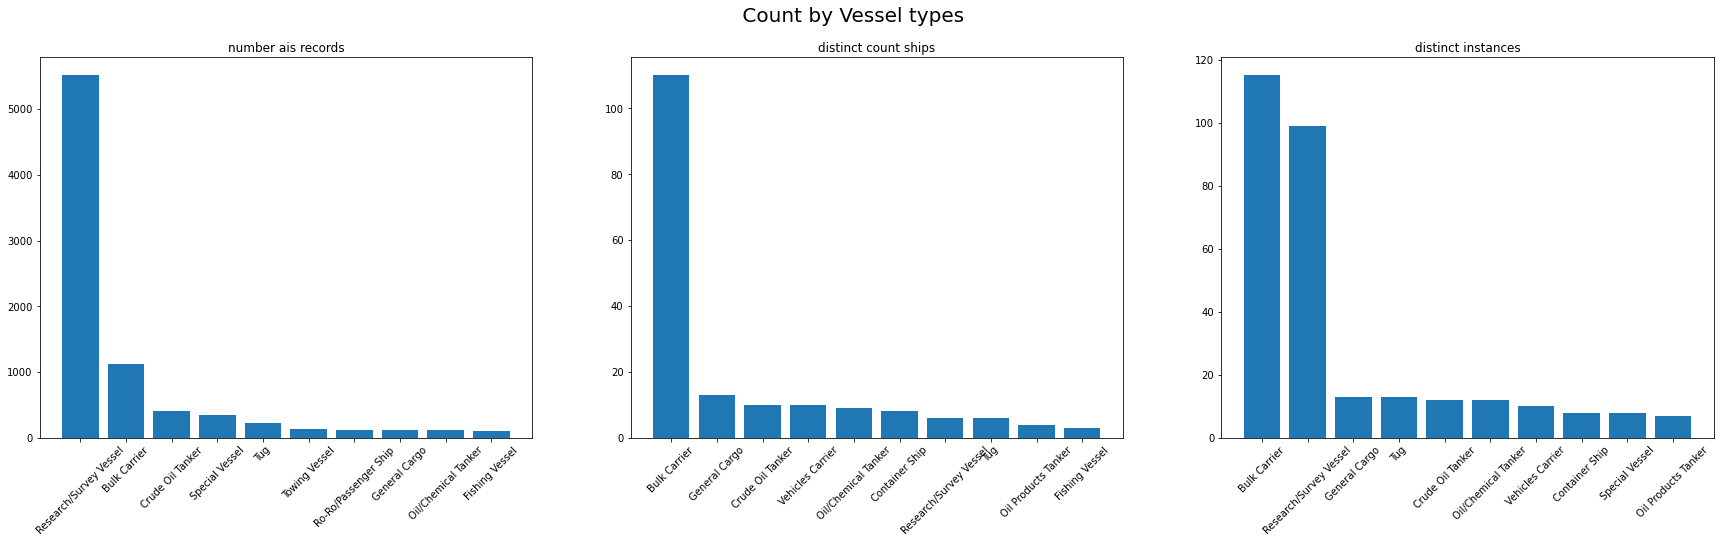

In [66]:
n=10
fig,ax= plt.subplots(1,3,figsize=(30,7))
fig.suptitle(' Count by Vessel types', fontsize=20)
ais_vessel_dist=ais_vessel_dist.sort_values(by='number ais records',ascending=False)
ax[0].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['number ais records'].iloc[:n])
ax[0].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[0].set_title('number ais records')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct count ships',ascending=False)
ax[1].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct count ships'].iloc[:n])
ax[1].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[1].set_title('distinct count ships')
ais_vessel_dist=ais_vessel_dist.sort_values(by='distinct instances',ascending=False)
ax[2].bar(ais_vessel_dist['VESSEL TYPE'].iloc[:n],ais_vessel_dist['distinct instances'].iloc[:n])
ax[2].set_xticklabels(ais_vessel_dist['VESSEL TYPE'].unique()[:n],rotation = 45)
ax[2].set_title('distinct instances')
